In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/home/rafael/prj/data_analysis/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime(2015, 4, 2)
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)


In [3]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,193.576048,195.216008,192.062846,193.785890,5.772710e+07,99.067734
std,183.097485,184.599509,182.139463,183.693380,2.405554e+07,14.412014
min,90.209999,90.699997,89.650002,90.279999,1.447960e+07,70.121497
25%,99.410004,100.680000,98.570000,99.620003,4.224620e+07,89.444262
50%,111.389999,112.480003,109.349998,110.379997,5.320460e+07,96.784559
75%,127.279999,128.399994,125.760002,127.040001,6.792940e+07,109.563976
max,649.900002,651.259979,644.470024,647.349983,1.899779e+08,128.430494


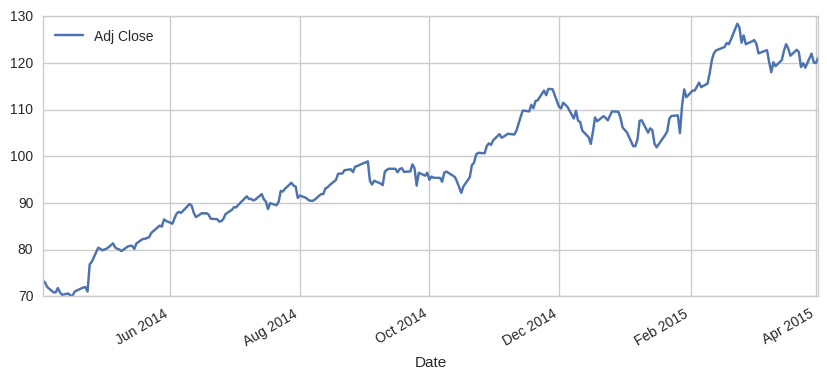

In [4]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

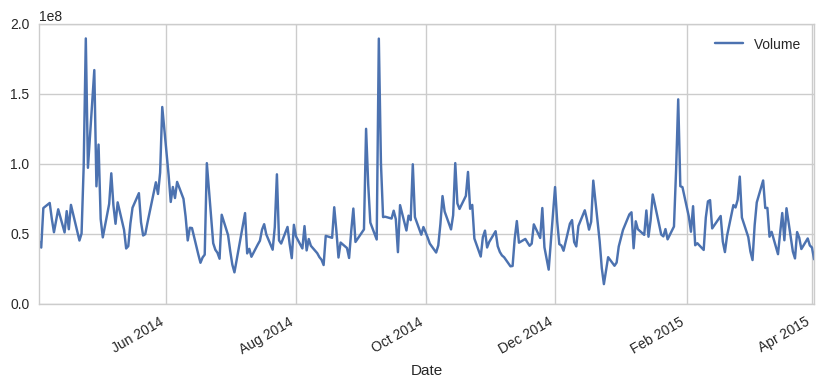

In [5]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [6]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/rafael/prj/data_analysis/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


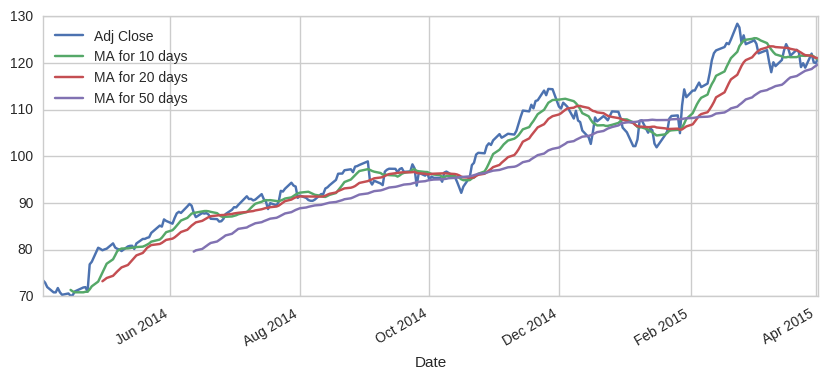

In [7]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

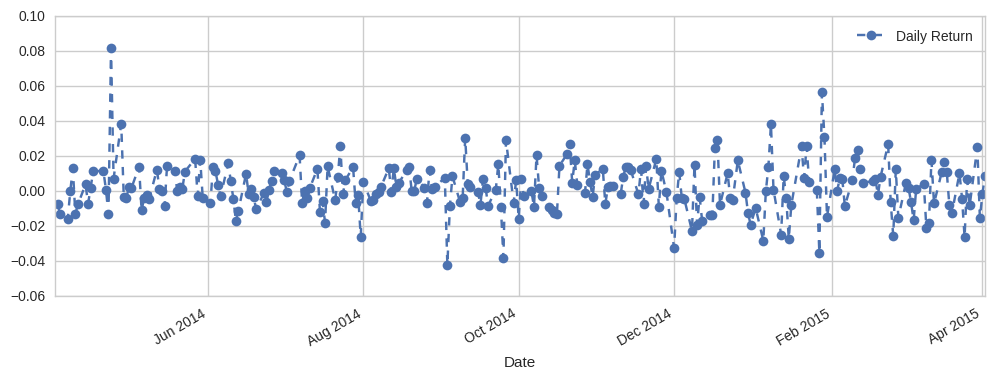

In [8]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

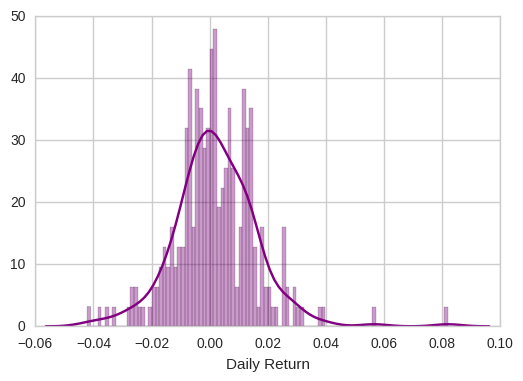

In [9]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

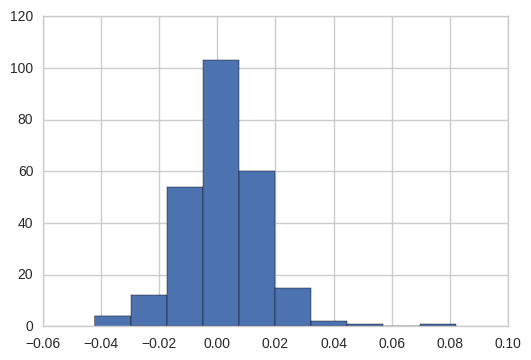

In [10]:
# Could have also done:
AAPL['Daily Return'].hist()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [12]:
# Let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-04-02,73.450494,341.959991,567.002574,38.420779
2014-04-03,72.941467,333.619995,569.742571,38.104865
2014-04-04,71.997869,323.000000,543.142460,37.045622
2014-04-07,70.867439,317.760010,538.152456,36.980581
2014-04-08,70.863383,327.070007,554.902495,36.999165


In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

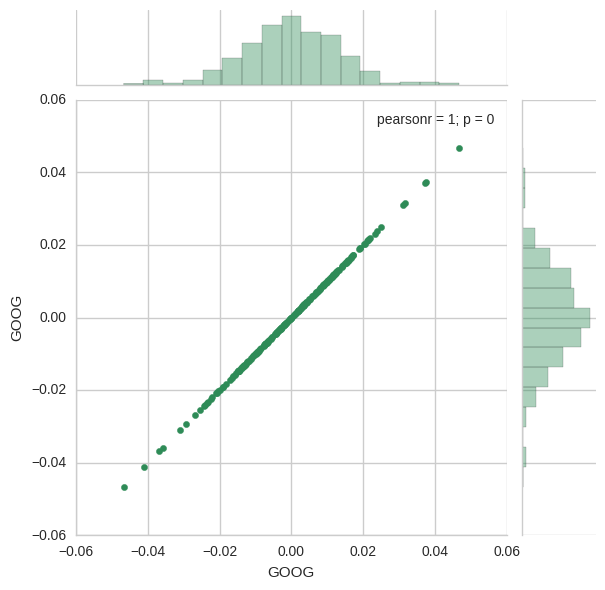

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

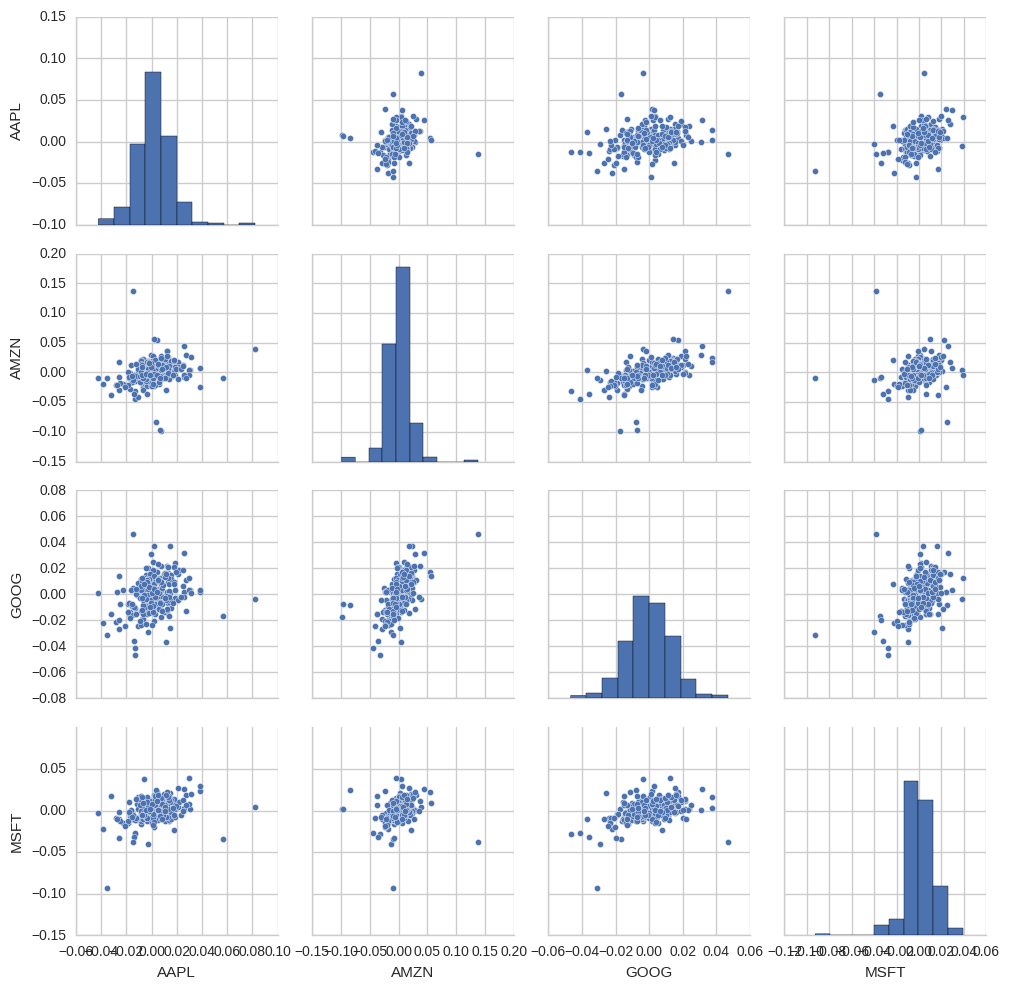

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

In [16]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-04-02,NaN,NaN,NaN,NaN
2014-04-03,-0.006930,-0.024389,0.004832,-0.008222
2014-04-04,-0.012936,-0.031833,-0.046688,-0.027798
2014-04-07,-0.015701,-0.016223,-0.009187,-0.001756
2014-04-08,-0.000057,0.029299,0.031125,0.000503


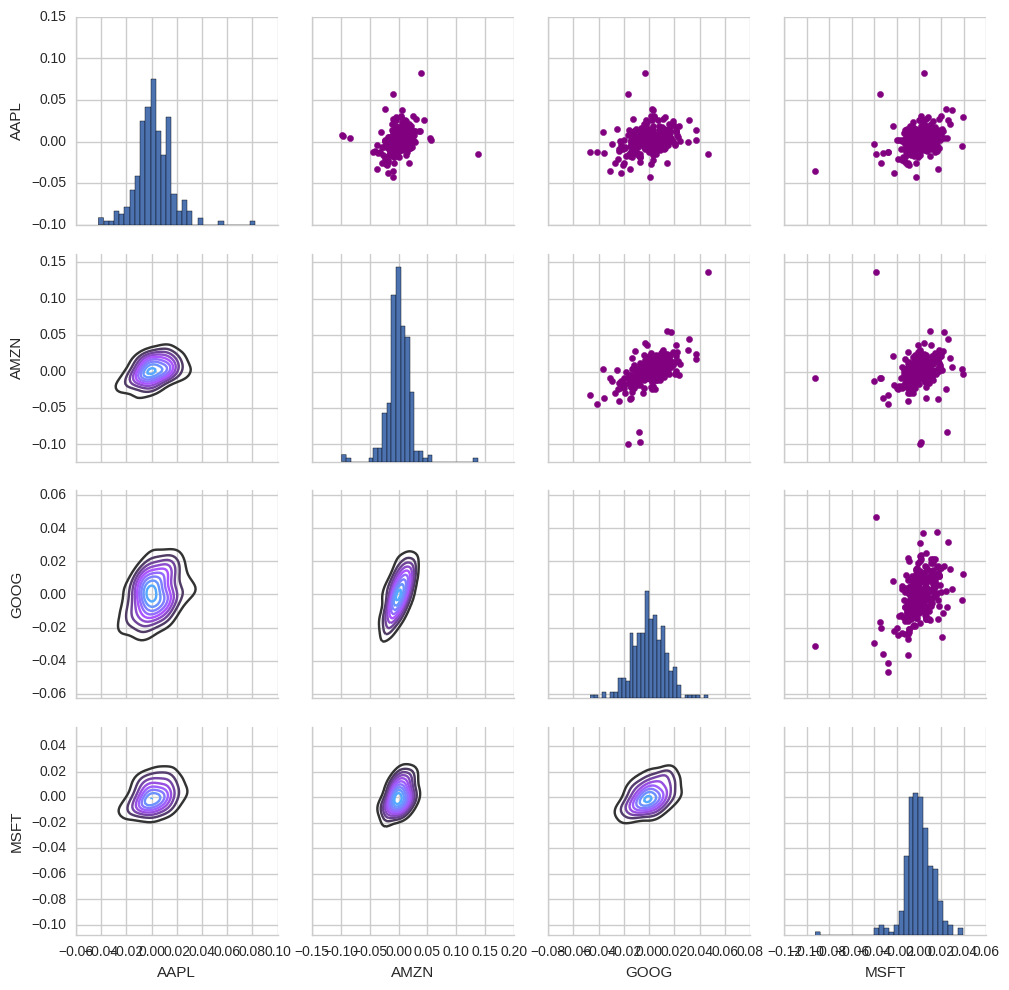

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [18]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-04-02,73.450494,341.959991,567.002574,38.420779
2014-04-03,72.941467,333.619995,569.742571,38.104865
2014-04-04,71.997869,323.000000,543.142460,37.045622
2014-04-07,70.867439,317.760010,538.152456,36.980581
2014-04-08,70.863383,327.070007,554.902495,36.999165


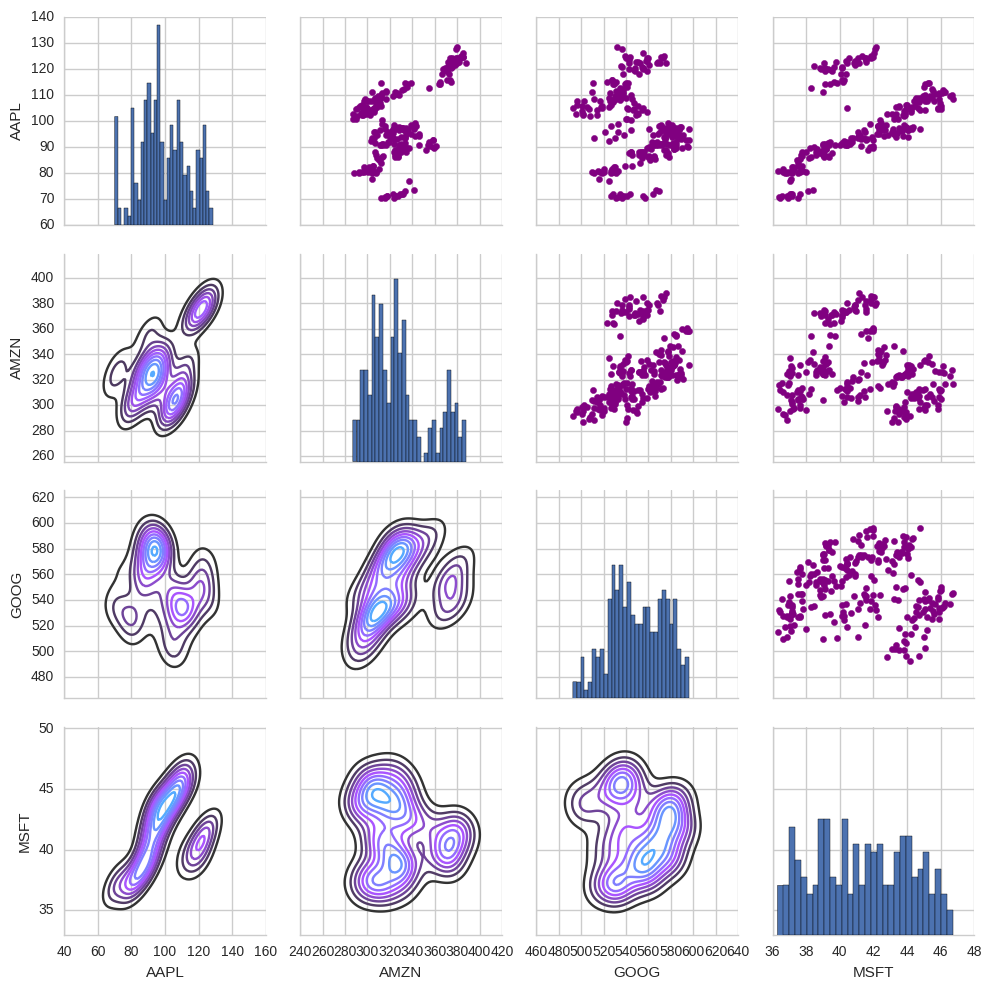

In [19]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

/home/rafael/prj/data_analysis/local/lib/python2.7/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/rafael/prj/data_analysis/local/lib/python2.7/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


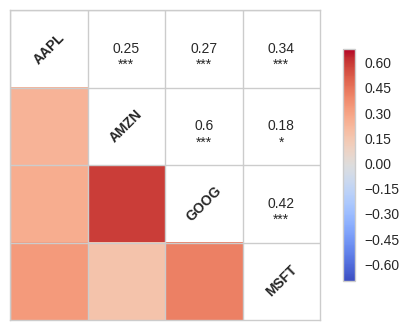

In [20]:
from seaborn.linearmodels import corrplot
corrplot(tech_rets.dropna(), annot=True)

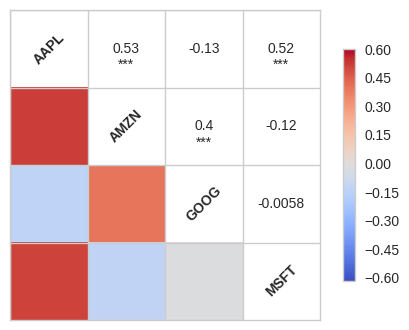

In [21]:
corrplot(closing_df, annot=True)

In [22]:
rets = tech_rets.dropna()

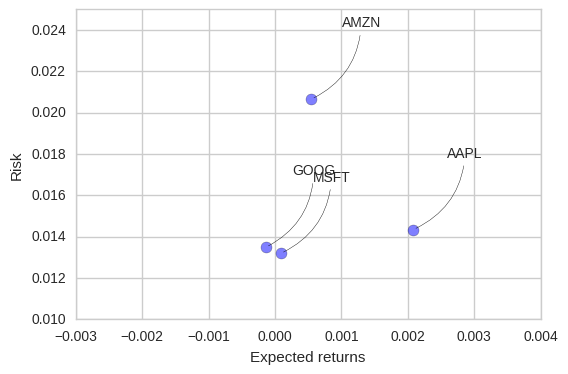

In [23]:
area = numpy.pi*20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01, 0.025])
plt.xlim([-0.003, 0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

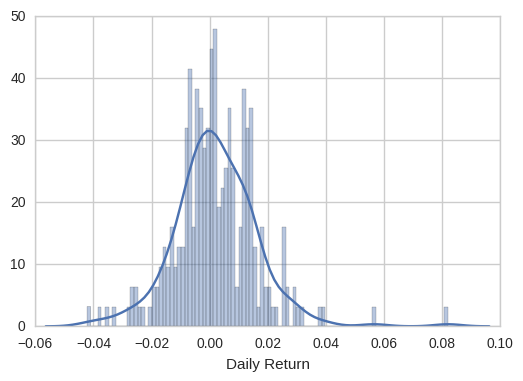

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [25]:
rets['AAPL'].quantile([0.05, 0.01, 0.001])

0.050   -0.019017
0.010   -0.033709
0.001   -0.041184
Name: AAPL, dtype: float64

In [26]:
rets.quantile([0.05, 0.01, 0.001])

,AAPL,AMZN,GOOG,MSFT
0.050,-0.019017,-0.025886,-0.022187,-0.016576
0.010,-0.033709,-0.063462,-0.036270,-0.036353
0.001,-0.041184,-0.098240,-0.045287,-0.079271


In [27]:
quant = rets.quantile([0.05, 0.01, 0.001])

In [28]:
# Considerando um investimento de 1 milhão, estas são as estimativas de perda máxima com 95%, 99% e 99,9%
# de confiança em cada empresa.
quant.round(3).abs() * 1000000

,AAPL,AMZN,GOOG,MSFT
0.050,19000.0,26000.0,22000.0,17000.0
0.010,34000.0,63000.0,36000.0,36000.0
0.001,41000.0,98000.0,45000.0,79000.0


In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = numpy.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = numpy.zeros(days)
    drift = numpy.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [30]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-02,599.992707,604.832763,562.192568,567.002574,147100,567.002574
2014-04-03,569.852553,587.282679,564.132581,569.742571,5099100,569.742571
2014-04-04,574.652582,577.772589,543.002488,543.142460,6369300,543.142460
2014-04-07,540.742445,548.482483,527.152379,538.152456,4401600,538.152456
2014-04-08,542.602466,555.002500,541.612446,554.902495,3151200,554.902495


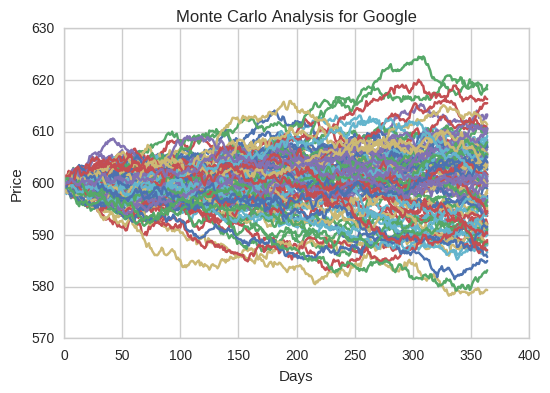

In [31]:
start_price = 599.99

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [32]:
runs = 10000

simulations = numpy.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

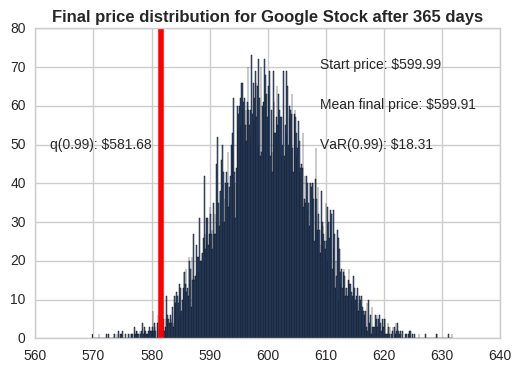

In [33]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = numpy.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=500)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [34]:
import ipyparallel
clients = ipyparallel.Client()
clients.ids

[0, 1, 2, 3]

In [35]:
dview = clients[:]
len(dview)

4

In [36]:
def square(x):
    return x**2
 
results = dview.map_sync(square, range(4))
#results.wait_on_send()
print(results)

[0, 1, 4, 9]


In [46]:
def simulations(runs):
    simulations = numpy.zeros(runs)
    
    start_price = 599.99

    # Set up our time horizon
    days = 365

    # Now our delta
    dt = 1/days

    # Now let's grab our mu (drift) from the expected return data we got for AAPL
    mu = rets.mean()['GOOG']

    # Now let's grab the volatility of the stock from the std() of the average return
    sigma = rets.std()['GOOG']


    for run in xrange(runs):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    return simulations

In [38]:
%time simulations(10000)

CPU times: user 6.96 s, sys: 24 ms, total: 6.98 s
Wall time: 6.98 s


array([ 595.30337296,  606.16857395,  618.71462434, ...,  601.27363213,
        605.91360186,  601.77349257])

In [41]:
def multicore_simulations(runs, dview):
    with dview.sync_imports():
        import numpy
    
    sims = dview.map_sync(simulations, [int(runs/len(dview))]*len(dview))
    return sims

In [49]:
dview['stock_monte_carlo'] = stock_monte_carlo
dview['rets'] = rets
dview['dt'] = dt
%time multicore_simulations(10000, dview)

importing numpy on engine(s)
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 3.75 s


[array([ 598.06066945,  596.12722817,  601.70231324, ...,  598.3315712 ,
         593.74117401,  608.16638156]),
 array([ 604.43001766,  599.45186093,  605.34809229, ...,  601.27073233,
         610.07740499,  599.05765251]),
 array([ 587.56220875,  601.87979792,  597.46572673, ...,  576.32383118,
         608.74825473,  602.43358344]),
 array([ 603.93824455,  606.10858553,  600.51071949, ...,  602.23077284,
         600.10071494,  593.05662606])]

In [50]:
%time simulations(100000)

CPU times: user 1min 10s, sys: 52 ms, total: 1min 10s
Wall time: 1min 10s


array([ 593.69851298,  591.72298289,  596.41287604, ...,  613.09759119,
        595.11861764,  593.84328925])

In [51]:
dview['stock_monte_carlo'] = stock_monte_carlo
dview['rets'] = rets
dview['dt'] = dt
%time multicore_simulations(100000, dview)

importing numpy on engine(s)
CPU times: user 28 ms, sys: 12 ms, total: 40 ms
Wall time: 36.8 s


[array([ 587.4057688 ,  590.75634151,  602.67537725, ...,  600.6625131 ,
         593.77538785,  605.53198456]),
 array([ 601.75884252,  598.39868206,  589.99342817, ...,  592.80783178,
         598.65032987,  594.94648603]),
 array([ 575.73423334,  604.91738712,  609.26905293, ...,  608.65151724,
         604.38039642,  604.06767001]),
 array([ 601.49354106,  602.31736558,  608.08368415, ...,  595.089875  ,
         601.99221723,  604.77503976])]